In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

In [1]:
from AssetAllocation import RiskParity, PrepDataRP # Cannot import 

In [3]:
test_csv = pd.read_csv('test_csv_3.csv')

In [4]:
test_csv

,Date,ACWI,TIP,GSG,GVI
0,01/03/2008,38.627758,81.041718,57.860001,78.569115
1,01/04/2008,41.705772,79.354637,62.599998,78.212563
2,01/05/2008,42.066036,80.034706,67.900002,77.336098
3,01/06/2008,38.706081,81.173164,74.910004,77.526398
4,01/07/2008,37.484280,80.759224,64.930000,77.938805
...,...,...,...,...,...
145,01/04/2020,68.143501,120.831375,8.480000,115.598473
146,01/05/2020,71.614136,121.500793,9.820000,116.494965
147,01/06/2020,73.101555,123.000000,10.370000,117.172935
148,01/07/2020,77.669998,125.860001,10.750000,117.951363


In [5]:
preprocessing = PrepDataRP()
cov_mat = preprocessing.transform(test_csv)
assets = preprocessing.assets_
print(assets)

['ACWI', 'TIP', 'GSG', 'GVI']


Minimised convex risk function value: -2.0762


C:\Users\Viet Hung Ha\Documents\Python\Risk Parity\AssetAllocation.py:62: RuntimeWarning: invalid value encountered in log
  risk_func = 0.5*x_T.dot(self.cov_mat).dot(x) - b_T*(np.sum(np.log(x)))


,Assets,Allocation
0,ACWI,0.0915
1,TIP,0.2592
2,GSG,0.0777
3,GVI,0.5717


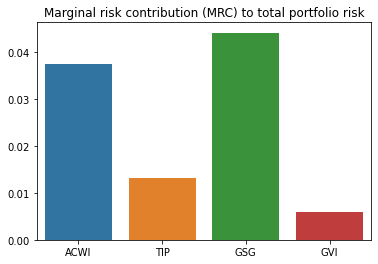

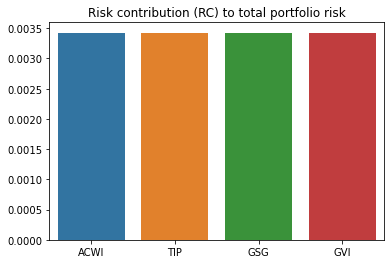

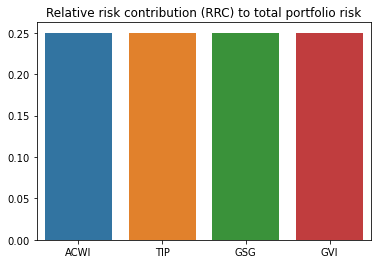

In [6]:
test_rpp = RiskParity(cov_mat, assets)
test_rpp.optimize(method='SLSQP')
test_rpp.cal_risk_stats()
test_rpp.visualise_risk_stats()

In [7]:
random_vector = np.array([0.33, 0.33, 0.34])

In [8]:
np.sum(random_vector)

1.0

In [9]:
random_vector < 0

array([False, False, False])

In [7]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-quotes"

querystring = {"region":"US","lang":"en","symbols":"BAC%2CKC%3DF%2C002210.KS%2CIWM%2CAMECX"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "0d85196943mshb6828091ff3fedap147d34jsnee33a93be78a"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"currency":"USD","sharesOutstanding":8664099840,"bookValue":27.956,"fiftyDayAverage":25.565428,"fiftyDayAverageChange":-0.27192688,"fiftyDayAverageChangePercent":-0.010636508,"twoHundredDayAverage":24.2405,"twoHundredDayAverageChange":1.0530014,"twoHundredDayAverageChangePercent":0.043439757,"marketCap":219145420800,"forwardPE":11.874883,"priceToBook":0.9047611,"sourceInterval":15,"exchangeDataDelayedBy":0,"pageViews":{"midTermTrend":"UP","longTermTrend":"UP","shortTermTrend":"NEUTRAL"},"tradeable":false,"components":["^NQDMXJPLMAUD","^NQUSBLM","^NQG8000LMCAD","^NQG8000LMEUR","^NQDXUSMLTCGN","^NQG8000LMGBPN","^NQUSB8300LMCADN","^NQDM8300LMJPY","^NQUS500LCGN","^NQNA8300LMEURN","^NQG8000LMN","^NQNA8300LMJPYN","^NQG8300LM","^NQNALMEURN","^NQUSBLMCAD","^NQG8300LMAUDN","^NQDM8000LMCADN","^NQDM8300LMCAD","^NQDMXKRJPYN","^NQDMXKRLMAUDN","^NQDMXJPLMAU

In [11]:
import time

date_time = '29.08.2011'
pattern = ('%d.%m.%Y')
epoch = int(time.mktime(time.strptime(date_time, pattern)))

In [32]:
def time_to_unix(start, finish, pattern='%d.%m.%Y'):
    import time
    start_unix = int(time.mktime(time.strptime(start, pattern)))
    finish_unix = int(time.mktime(time.strptime(finish, pattern)))
    return str(start_unix), str(finish_unix)

In [33]:
time_to_unix('30.08.2010', '30.08.2020')

('1283122800', '1598742000')

In [14]:
def get_price_data(symbol, start, finish, freq="1mo"):
    import time
    import requests
    # Converting date time to human readable
    pattern = '%d.%m.%Y'
    start_unix = int(time.mktime(time.strptime(start, pattern)))
    start_str = str(start_unix)
    finish_unix = int(time.mktime(time.strptime(finish, pattern)))
    finish_str = str(finish_unix)
    # Connecting to RapidAPI
    url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-historical-data"
    querystring = {"frequency":freq,"filter":"history","period1":start_str,"period2":start_str,
                   "symbol":symbol}
    headers = {
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
        'x-rapidapi-key': "0d85196943mshb6828091ff3fedap147d34jsnee33a93be78a"
        }
#     response = requests.request("GET", url, headers=headers, params=querystring)
#     print(response.text)

In [15]:
get_price_data('MSFT', '30.08.2010', '30.08.2020')

In [ ]:
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v3/get-historical-data"

querystring = {"region":"US","symbol":"AMRN"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "0d85196943mshb6828091ff3fedap147d34jsnee33a93be78a"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

In [16]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-historical-data"

querystring = {"frequency":"1mo","filter":"history","period1":"1283122800","period2":"1598742000","symbol":"MSFT"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "0d85196943mshb6828091ff3fedap147d34jsnee33a93be78a"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)


{"prices":[{"amount":0.51,"date":1597843800,"type":"DIVIDEND","data":0.51},{"date":1596254400,"open":211.52000427246094,"high":231.14999389648438,"low":203.13999938964844,"close":228.91000366210938,"volume":663671200,"adjclose":228.3579864501953},{"date":1593576000,"open":203.13999938964844,"high":216.3800048828125,"low":197.50999450683594,"close":205.00999450683594,"volume":770510200,"adjclose":204.51560974121094},{"date":1590984000,"open":182.5399932861328,"high":204.39999389648438,"low":181.35000610351562,"close":203.50999450683594,"volume":764905600,"adjclose":203.01922607421875},{"amount":0.51,"date":1589981400,"type":"DIVIDEND","data":0.51},{"date":1588305600,"open":175.8000030517578,"high":187.50999450683594,"low":173.8000030517578,"close":183.25,"volume":688938200,"adjclose":182.30038452148438},{"date":1585713600,"open":153,"high":180.39999389648438,"low":150.36000061035156,"close":179.2100067138672,"volume":984596200,"adjclose":178.28131103515625},{"date":1583038800,"open":165

In [10]:
response_json = json.loads(response.text)

In [12]:
response_json

{'quoteResponse': {'result': [{'language': 'en-US',
    'region': 'US',
    'quoteType': 'EQUITY',
    'quoteSourceName': 'Nasdaq Real Time Price',
    'triggerable': True,
    'currency': 'USD',
    'sharesOutstanding': 8664099840,
    'bookValue': 27.956,
    'fiftyDayAverage': 25.565428,
    'fiftyDayAverageChange': -0.27192688,
    'fiftyDayAverageChangePercent': -0.010636508,
    'twoHundredDayAverage': 24.2405,
    'twoHundredDayAverageChange': 1.0530014,
    'twoHundredDayAverageChangePercent': 0.043439757,
    'marketCap': 219145420800,
    'forwardPE': 11.874883,
    'priceToBook': 0.9047611,
    'sourceInterval': 15,
    'exchangeDataDelayedBy': 0,
    'pageViews': {'midTermTrend': 'UP',
     'longTermTrend': 'UP',
     'shortTermTrend': 'NEUTRAL'},
    'tradeable': False,
    'components': ['^NQDMXJPLMAUD',
     '^NQUSBLM',
     '^NQG8000LMCAD',
     '^NQG8000LMEUR',
     '^NQDXUSMLTCGN',
     '^NQG8000LMGBPN',
     '^NQUSB8300LMCADN',
     '^NQDM8300LMJPY',
     '^NQUS500LC

In [11]:
response_json['prices']

KeyError: 'prices'

In [19]:
response_json['prices'][1]['adjclose']

228.3579864501953

# Only run from this onward!

In [58]:
date_list_unix = []
adj_close_list = []
for index in range(len(response_json['prices'])):
    if len(response_json['prices'][index]) == 7:
        adj_close = response_json['prices'][index]['adjclose']
        adj_close_list.append(adj_close)
        date = response_json['prices'][index]['date']
        date_list_unix.append(date)

len(date_list_unix) == len(adj_close_list)

True

In [59]:
test_df = pd.DataFrame({'Date':date_list_unix, 'Price':adj_close_list})
test_df

,Date,Price
0,1596254400,228.357986
1,1593576000,204.515610
2,1590984000,203.019226
3,1588305600,182.300385
4,1585713600,178.281311
...,...,...
115,1293858000,22.105003
116,1291179600,22.248495
117,1288584000,20.013079
118,1285905600,21.130194


In [60]:
from datetime import datetime
type(date_list_unix[1])
date_list = [datetime.fromtimestamp(unix_date) for unix_date in date_list_unix]

In [62]:
date_list_ymd = [item.date() for item in date_list]

In [64]:
test_df_2 = pd.DataFrame({'Date':date_list_ymd, 'MSFT':adj_close_list})
test_df_2
# Looks good!

,Date,MSFT
0,2020-08-01,228.357986
1,2020-07-01,204.515610
2,2020-06-01,203.019226
3,2020-05-01,182.300385
4,2020-04-01,178.281311
...,...,...
115,2011-01-01,22.105003
116,2010-12-01,22.248495
117,2010-11-01,20.013079
118,2010-10-01,21.130194


In [103]:
api_key = "0d85196943mshb6828091ff3fedap147d34jsnee33a93be78a"
security = "MSFT"
freq = "1mo"
start = "2010-30-08"
finish = "2020-30-08"

class api_data():
    def __init__(self, api_key, assets, start, finish, freq):
        self.api_key = api_key
        self.assets = assets # List of assets, to be looped later
        self.start = start
        self.finish = finish
        self.freq = freq
    
    def time_to_unix(self, date, pattern='%Y.%m.%d'):
        import time
        unix = int(time.mktime(time.strptime(date, pattern)))
        return unix

    def get_api_data(self, api_key, asset, freq, start, finish):
        import requests
        import json
        start = self.time_to_unix(self.start, pattern='%Y.%m.%d')
        finish = self.time_to_unix(self.finish, pattern='%Y.%m.%d')
        url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-historical-data"
        querystring = {"frequency":self.freq, "filter":"history", "period1":start,
                       "period2":finish,"symbol":asset}
        headers = {
            'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
            'x-rapidapi-key': self.api_key
            }
        response = requests.request("GET", url, headers=headers, params=querystring)
        response_json = json.loads(response.text)
        return response_json

    def make_time_series(self, response_json, asset=None): # NEED TO FILL OUT THE ARGS
        from datetime import datetime
        import pandas as pd
        date_list_unix = []
        adj_close_list = []
        for index in range(len(response_json['prices'])):
            if len(response_json['prices'][index]) == 7:
                adj_close = response_json['prices'][index]['adjclose']
                adj_close_list.append(adj_close)
                date = response_json['prices'][index]['date']
                date_list_unix.append(date)
        date_list = [datetime.fromtimestamp(unix_date) for unix_date in date_list_unix] # Convert unix to human date
        date_list_ymd = [item.date() for item in date_list] # Getting date (years, months and days) only
        time_series_df = pd.DataFrame({'Date':date_list_ymd, f'{asset}':adj_close_list})
        return time_series_df

    def prep_data(self, api_key=None, assets=None, 
                  start=None, finish=None, freq=None): # Combined function, using the helper function
        if api_key is None:
            api_key = self.api_key
        if assets is None:
            assets = self.assets
        if start is None:
            start = self.start
        if finish is None:
            finish = self.finish
        if freq is None:
            freq = self.freq
        time_series_dict = {}
        time_series_list = []
        for asset in self.assets: 
            # Go through the motions
            response_json = self.get_api_data(api_key=self.api_key, asset=asset, freq=self.freq, start=self.start, finish=self.finish)
            time_series_df = self.make_time_series(response_json=response_json, asset=asset)
            time_series_dict[f"{asset}_df"] = time_series_df #For example MSFT_df is a time series dataframe with 2 cols: date and price
            # Now we got a time series dictionary with security name key and their time series dataframe as value
            time_series_list.append(time_series_dict[f"{asset}_df"])
        merged_df = pd.concat(time_series_list, axis=1, join='outer')
        merged_df = merged_df.reindex(index=merged_df.index[::-1])
        merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
        return merged_df

In [115]:
from secret import api_key as api_secret

In [116]:
api_secret

'0d85196943mshb6828091ff3fedap147d34jsnee33a93be78a'

In [65]:
test_dict = {}
test_keyname = 'MSFT'
test_dict[f"{test_keyname}"] = test_df
test_dict['second_one'] = test_df_2

In [79]:
random_df_list_1 = [test_df, test_df_2]
random_df_list.append(test_df)

TypeError: append() takes exactly one argument (2 given)

In [ ]:
for key in test_dict:
    print(test_dict[key])

In [104]:
api_data = api_data(api_key, ['MSFT', 'AAPL', 'ZM'], '2010.08.30', '2020.08.30', '1mo')

In [106]:
outcome_df = api_data.prep_data()

In [43]:
def time_to_unix(date, pattern='%Y.%m.%d'):
    import time
    unix = int(time.mktime(time.strptime(date, pattern)))
    return unix

time_to_unix('2020.08.31')

1598828400

In [113]:
outcome_df[-2:-1]

,Date,MSFT,AAPL,ZM
1,2020-07-01,204.51561,106.068756,253.910004


In [120]:
preprocessing = PrepDataRP()
cov_mat_3 = preprocessing.transform(outcome_df)
assets = preprocessing.assets_

Minimised convex risk function value: -1.1185


C:\Users\Viet Hung Ha\Documents\Python\Risk Parity\AssetAllocation.py:37: RuntimeWarning: invalid value encountered in log
  risk_func = 0.5*x_T.dot(self.cov_mat).dot(x) - b_T*(np.sum(np.log(x)))


,Assets,Allocation
0,MSFT,0.4854
1,AAPL,0.3006
2,ZM,0.2139


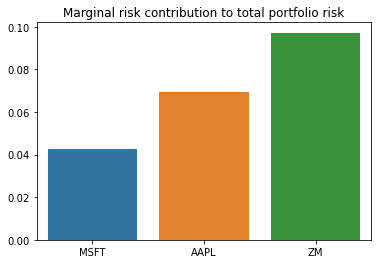

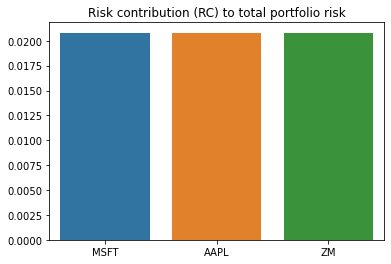

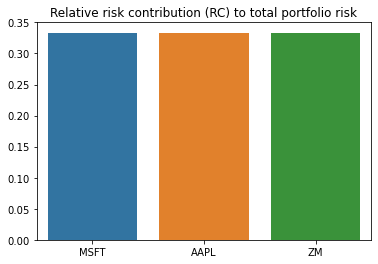

In [121]:
test_rpp = RiskParity(cov_mat_3, assets)
test_rpp.optimize()
test_rpp.cal_risk_stats()
test_rpp.visualise_risk_stats()

In [25]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-historical-data"

querystring = {"frequency":"1d","filter":"history","period1":"1546448400","period2":"1562086800","symbol":"ACWI"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "0d85196943mshb6828091ff3fedap147d34jsnee33a93be78a"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

{"prices":[{"date":1562074200,"open":74.29000091552734,"high":74.47000122070312,"low":74.1500015258789,"close":74.47000122070312,"volume":3807100,"adjclose":72.96245574951172},{"date":1561987800,"open":74.5,"high":74.63999938964844,"low":74.04000091552734,"close":74.29000091552734,"volume":2812100,"adjclose":72.78610229492188},{"date":1561728600,"open":73.61000061035156,"high":73.77999877929688,"low":73.5,"close":73.70999908447266,"volume":2653100,"adjclose":72.21783447265625},{"date":1561642200,"open":73.30999755859375,"high":73.47000122070312,"low":73.23999786376953,"close":73.4000015258789,"volume":1761300,"adjclose":71.91411590576172},{"date":1561555800,"open":73.31999969482422,"high":73.44000244140625,"low":73.08000183105469,"close":73.12000274658203,"volume":2500700,"adjclose":71.63978576660156},{"date":1561469400,"open":73.66999816894531,"high":73.69999694824219,"low":73.0199966430664,"close":73.06999969482422,"volume":3736200,"adjclose":71.59078979492188},{"date":1561383000,"op

In [35]:
response_json_2 = json.loads(response.text)
response_json_2['prices'][0]
adj_close_list = []
for index in range(len(response_json_2['prices'])):
    if len(response_json_2['prices'][index]) == 7:
        adj_close = response_json_2['prices'][index]['adjclose']
        adj_close_list.append(adj_close)

In [34]:
len(response_json_2['prices'][1]) == 7

True

In [37]:
adj_close_list

[72.96245574951172,
 72.78610229492188,
 72.21783447265625,
 71.91411590576172,
 71.63978576660156,
 71.59078979492188,
 72.16885375976562,
 72.24722290039062,
 72.44318389892578,
 71.62998962402344,
 71.39485168457031,
 70.48367309570312,
 70.41900634765625,
 70.7286148071289,
 70.48673248291016,
 70.89310455322266,
 70.6899185180664,
 70.38998413085938,
 69.65463256835938,
 69.28695678710938,
 69.04507446289062,
 67.94204711914062,
 67.81626892089844,
 68.48389434814453,
 68.1839370727539,
 68.58063507080078,
 69.17085266113281,
 68.79350280761719,
 69.57723236083984,
 69.85781860351562,
 69.2289047241211,
 69.65463256835938,
 70.1867904663086,
 69.66431427001953,
 69.38371276855469,
 68.74513244628906,
 70.51575469970703,
 70.08036041259766,
 70.4383544921875,
 70.47705841064453,
 71.69617462158203,
 72.29607391357422,
 71.54137420654297,
 71.70586395263672,
 72.19932556152344,
 72.131591796875,
 71.95742797851562,
 71.6865005493164,
 71.70586395263672,
 72.10255432128906,
 71.71553